<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/10%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [206]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [207]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

False
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [208]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# tensor = torch.tensor([1, 2, 3])
# tensor = tensor.to(device)
tensor = torch.tensor([1, 2, 3], device=device)


tensor

tensor([1, 2, 3])

In [209]:
device

device(type='cpu')

# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [210]:
tensor = torch.rand(2,3)
tensor = tensor.to(device)

print(tensor)
print(tensor.size())
print(tensor.type())
print(tensor.device)
print(tensor.requires_grad)


tensor([[0.8633, 0.4950, 0.8614],
        [0.3275, 0.9603, 0.1300]])
torch.Size([2, 3])
torch.FloatTensor
cpu
False


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [211]:
tensor1 = torch.randn(100)
tensor2 = torch.randn(100)

torch.mean(torch.abs(tensor1 - tensor2)).item()

1.1249923706054688

# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [212]:
tensor1 = torch.randn(32, 28, 28)
tensor2 = torch.randn(16, 28, 28)
tensor3 = torch.randn(64, 28, 28)

result = torch.cat((tensor1, tensor2, tensor3), dim=0)
result.size()

torch.Size([112, 28, 28])

# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [213]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [214]:
from torch.optim import SGD

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.5, requires_grad=True)

# швидкість навчання
learning_rate = 1e-2

# визначення алгоритму
optimizer = SGD([x],  # список тензорів, до яких застосуємо алгоритм
                lr=learning_rate
                )

for t in range(200):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
      print(f'{loss.item() = }')

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()

    # градієнтний спуск(версія без optimizer)
    # with torch.no_grad():

    #   x -= learning_rate*x.grad

    #   # очищуємо пам'ять для повторного обчислення градієнтів
    #   x.grad = None

loss.item() = 3.0833332538604736
loss.item() = 0.5896313190460205
loss.item() = -0.2855294346809387
loss.item() = -0.29762721061706543
loss.item() = -0.29779064655303955
loss.item() = -0.297792911529541
loss.item() = -0.297792911529541
loss.item() = -0.2977929711341858
loss.item() = -0.2977929711341858
loss.item() = -0.2977929711341858


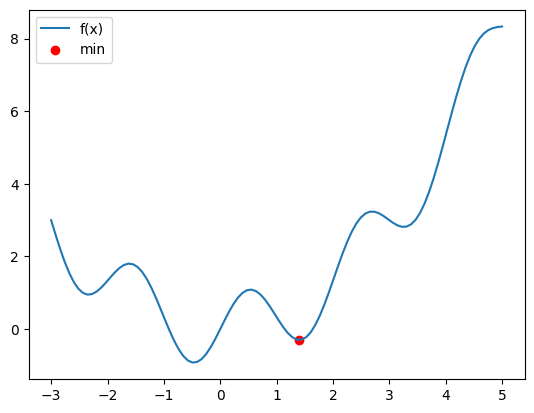

In [215]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [216]:
x

tensor(1.4037, requires_grad=True)

In [217]:
# !pip install -q torchviz
from torchviz import make_dot

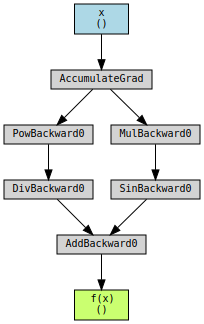

In [218]:
loss = f(x)

dot = make_dot(loss, params={'x': x, 'f(x)': loss})
dot

**спуск з моментом**

In [219]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(4.5, requires_grad=True)

# швидкість навчання
learning_rate = 1e-2

# ініціалізація моменту
moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

    # градієнтний спуск
    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None

loss.item()=7.75
loss.item()=0.7890135645866394
loss.item()=0.7664249539375305
loss.item()=-0.7329062819480896
loss.item()=-0.9103239178657532
loss.item()=-0.9108061790466309
loss.item()=-0.8867462873458862
loss.item()=-0.9154816269874573
loss.item()=-0.9211283922195435
loss.item()=-0.9200690388679504
loss.item()=-0.9218531847000122
loss.item()=-0.921809732913971
loss.item()=-0.921868085861206
loss.item()=-0.9219434261322021
loss.item()=-0.9219324588775635
loss.item()=-0.9219416379928589
loss.item()=-0.921943187713623
loss.item()=-0.9219428896903992
loss.item()=-0.9219434857368469
loss.item()=-0.9219434857368469


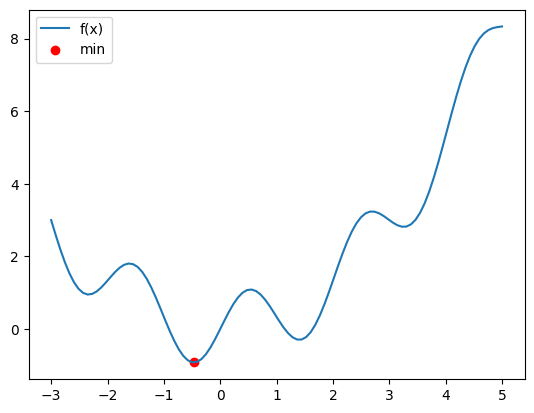

In [220]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [221]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

In [222]:
import torch

# підключаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(-10., requires_grad=True, device=device)
y = torch.tensor(10., requires_grad=True, device=device)

# швидкість навчання
learning_rate = 1e-2

# ініціалізація моменту
moment_x = torch.tensor(0.0, device=device)
moment_y = torch.tensor(0.0, device=device)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f1(x, y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
        print(f'loss: {loss.detach().item()}')

    # градієнтний спуск
    with torch.no_grad():
        moment_x = beta * moment_x + learning_rate * x.grad
        moment_y = beta * moment_y + learning_rate * y.grad
        x -= moment_x
        y -= moment_y

        # очищуємо пам'ять для повторного обчислення градієнтів
        x.grad = None
        y.grad = None


# import matplotlib.pyplot as plt

# xs = torch.linspace(-1000, 1500, 100)
# ys = torch.linspace(-1000, 1500, 100)
# x_np = x.detach().cpu().numpy()
# y_np = y.detach().cpu().numpy()
# res_min = f1(x, y).detach().cpu().numpy()

# plt.scatter(x_np, res_min, c='red', label='min')
# plt.legend()
# plt.show()


loss: 837.9658203125
loss: 812.054931640625
loss: 813.978759765625
loss: 810.6437377929688
loss: 810.0407104492188
loss: 810.1218872070312
loss: 809.9928588867188
loss: 809.9412841796875
loss: 809.9443969726562
loss: 809.9411010742188
loss: 809.9378662109375
loss: 809.937744140625
loss: 809.937744140625
loss: 809.9375610351562
loss: 809.9375610351562
loss: 809.9375610351562
loss: 809.9375610351562
loss: 809.9375610351562
loss: 809.9375610351562
loss: 809.9375610351562


In [223]:
from torch.optim import SGD

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(0.5, requires_grad=True)
y = torch.tensor(0.5, requires_grad=True)

# швидкість навчання
learning_rate = 1e-2

# визначення алгоритму
optimizer = SGD([x, y],  # список тензорів, до яких застосуємо алгоритм
                lr=learning_rate
                )

for t in range(200):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f1(x, y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
      print(f'{loss.item() = }')

loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375
loss.item() = 837.316162109375


In [224]:
x

tensor(0.5000, requires_grad=True)

In [225]:
y

tensor(0.5000, requires_grad=True)

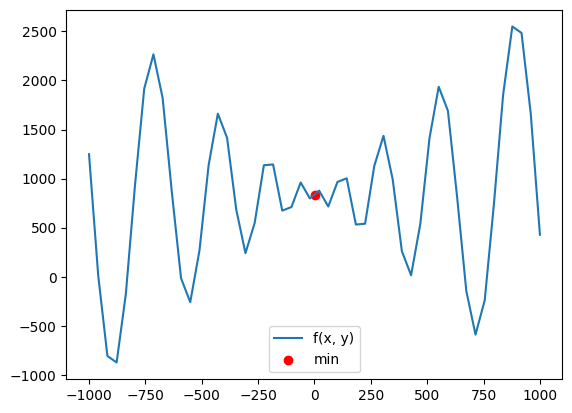

In [226]:
xs = torch.linspace(-1000, 1000, 50)
ys = torch.linspace(-1000, 1000, 50)
res = f1(xs, ys)

# Перетворюємо тензори на NumPy масиви за допомогою .detach().numpy()
xs_np = xs.detach().cpu().numpy()
ys_np = ys.detach().cpu().numpy()

plt.plot(xs_np, res.detach().cpu().numpy(), label='f(x, y)')

    # Перетворюємо x і fun(x, y) на NumPy масиви за допомогою .detach().numpy()
x_np = x.detach().cpu().numpy()
y_np = y.detach().cpu().numpy()
res_min = f1(x, y).detach().cpu().numpy()

plt.scatter(x_np, res_min, c='red', label='min')
plt.legend()
plt.show()

In [227]:
from torch.optim import SGD

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(0.5, requires_grad=True)
y = torch.tensor(0.5, requires_grad=True)

# швидкість навчання
learning_rate = 1e-2

# визначення алгоритму
optimizer = SGD([x, y],  # список тензорів, до яких застосуємо алгоритм
                lr=learning_rate
                )

for t in range(200):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f2(x, y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
      print(f'{loss.item() = }')

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()

loss.item() = 0.9369791746139526
loss.item() = 0.20390596985816956
loss.item() = 0.04391889274120331
loss.item() = 0.012375742197036743
loss.item() = 0.0047529470175504684
loss.item() = 0.0022157318890094757
loss.item() = 0.0011210860684514046
loss.item() = 0.0005836296477355063
loss.item() = 0.00030664075165987015
loss.item() = 0.00016157628851942718


In [228]:
x

tensor(-0.0039, requires_grad=True)

In [229]:
y

tensor(0.0096, requires_grad=True)

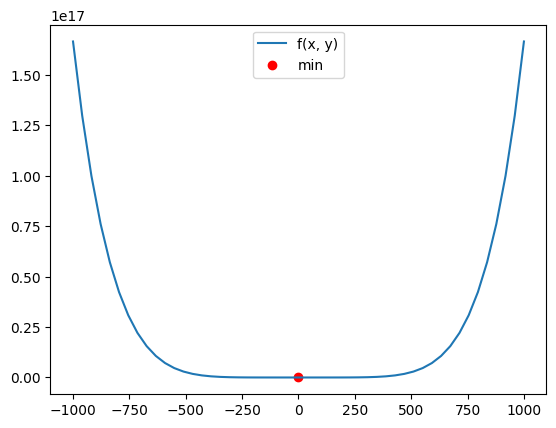

In [230]:
xs = torch.linspace(-1000, 1000, 50)
ys = torch.linspace(-1000, 1000, 50)
res = f2(xs, ys)

# Перетворюємо тензори на NumPy масиви за допомогою .detach().numpy()
xs_np = xs.detach().cpu().numpy()
ys_np = ys.detach().cpu().numpy()

plt.plot(xs_np, res.detach().cpu().numpy(), label='f(x, y)')

    # Перетворюємо x і fun(x, y) на NumPy масиви за допомогою .detach().numpy()
x_np = x.detach().cpu().numpy()
y_np = y.detach().cpu().numpy()
res_min = f2(x, y).detach().cpu().numpy()

plt.scatter(x_np, res_min, c='red', label='min')
plt.legend()
plt.show()


In [231]:
# f3

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-2

# визначення алгоритму
optimizer = SGD([x, y],  # список тензорів, до яких застосуємо алгоритм
                lr=learning_rate
                )

for t in range(200):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f3(x, y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
      print(f'{loss.item() = }')

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()

loss.item() = 113.10063171386719
loss.item() = 109.12480163574219
loss.item() = 109.04778289794922
loss.item() = 108.95948791503906
loss.item() = 108.85848999023438
loss.item() = 108.74942779541016
loss.item() = 108.63853454589844
loss.item() = 108.53357696533203
loss.item() = 108.44255828857422
loss.item() = 108.37122344970703


In [232]:
x

tensor(0.9235, requires_grad=True)

In [233]:
y

tensor(1.0262, requires_grad=True)

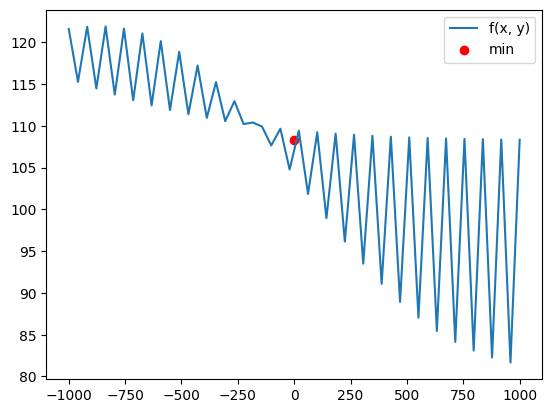

In [234]:
xs = torch.linspace(-1000, 1000, 50)
ys = torch.linspace(-1000, 1000, 50)
res = f3(xs, ys)

# Перетворюємо тензори на NumPy масиви за допомогою .detach().numpy()
xs_np = xs.detach().cpu().numpy()
ys_np = ys.detach().cpu().numpy()

plt.plot(xs_np, res.detach().cpu().numpy(), label='f(x, y)')

    # Перетворюємо x і fun(x, y) на NumPy масиви за допомогою .detach().numpy()
x_np = x.detach().cpu().numpy()
y_np = y.detach().cpu().numpy()
res_min = f3(x, y).detach().cpu().numpy()

plt.scatter(x_np, res_min, c='red', label='min')
plt.legend()
plt.show()

**Візуалізація функцій**

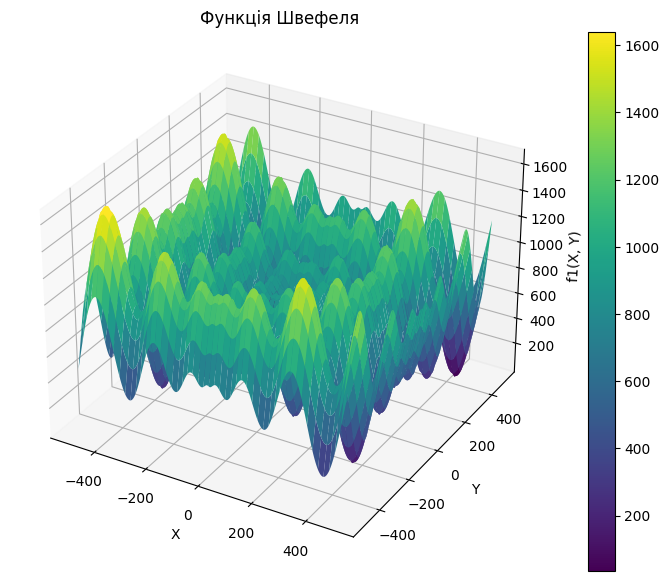

In [235]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Створюємо сітку значень
x = np.linspace(-500, 500, 400)
y = np.linspace(-500, 500, 400)
X, Y = np.meshgrid(x, y)

# Конвертуємо сітку в тензори PyTorch
X_torch = torch.tensor(X, dtype=torch.float32)
Y_torch = torch.tensor(Y, dtype=torch.float32)

# Обчислюємо значення функції
Z_torch = f1(X_torch, Y_torch)

# Конвертуємо результат назад в numpy масив
Z = Z_torch.detach().numpy()

# Створюємо графік
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')


# Додаємо кольорову шкалу
fig.colorbar(surf)

# Додаємо підписи осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f1(X, Y)')
ax.set_title('Функція Швефеля')

plt.show()


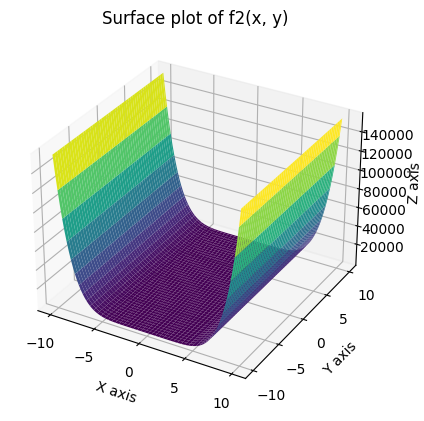

In [236]:
# Створення сітки значень x і y
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
x, y = torch.meshgrid(x, y)
z = f2(x, y)

# Перетворення тензорів в numpy масиви для побудови графіку
x = x.numpy()
y = y.numpy()
z = z.numpy()

# Побудова графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface plot of f2(x, y)')

plt.show()


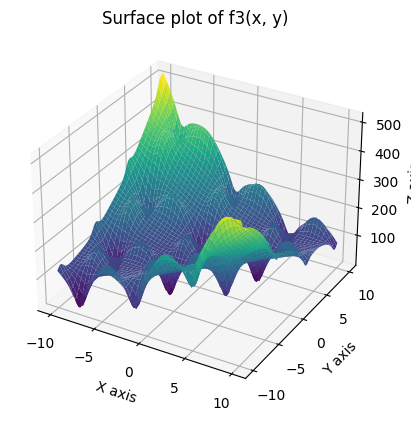

In [237]:
# Створення сітки значень x і y
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
x, y = torch.meshgrid(x, y)
z = f3(x, y)

# Перетворення тензорів в numpy масиви для побудови графіку
x = x.numpy()
y = y.numpy()
z = z.numpy()

# Побудова графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface plot of f3(x, y)')

plt.show()
